# EDA - dataset TON-IoT

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataset

In [36]:
# Define the file paths
file_paths = [
    f"../datasets/TON-IoT/Network_dataset_{i}_sampled.csv" for i in range(1, 24)
]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Process files
for file_path in file_paths:
    df = pd.concat([df, pd.read_csv(file_path)], axis=0, ignore_index=True)

In [37]:
# Creation of a bool column Attack (this will be done in the pipeline, as well as data cleaning and preprocessing)
df.rename(columns={'type': 'attack_type'}, inplace=True)
df['attack'] = df['attack_type'].apply(lambda x: False if x == 'normal' else True)

# Drop constant columns (also this will be done in the pipeline)
df.drop(columns=[col for col in df.columns if df[col].nunique() == 1], inplace=True)

# Fix negative and infinite values (also this will be done in the pipeline)
df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN temporarily
for col in df.columns:
    if df[col].dtype not in ['object', 'category', 'bool']:  # Ensure numeric columns
        max_val = df[df[col] > 0][col].max()
        df[col] = df[col].fillna(max_val)  # Replace inf and NaN caused by inf
        min_val = df[df[col] >= 0][col].min()
        df[col] = df[col].apply(lambda x: min_val if x < 0 else x)  # Replace negative values with the minimum

# Drop useless columns (also this will be done in the pipeline)
df.drop(columns=['ts','src_ip','src_port','dst_ip','dst_port','dns_query','uid',
                 'ssl_subject','ssl_issuer','http_method','http_uri','http_version','http_user_agent','http_orig_mime_types','weird_notice'], inplace=True)

# Cast integer columns with min value 0 and max value 1 to bool (also this will be done in the pipeline)
columns_to_cast = [col for col in df.columns
                   if pd.api.types.is_integer_dtype(df[col]) and df[col].min() == 0 and df[col].max() == 1]
df[columns_to_cast] = df[columns_to_cast].astype(bool)

df.head()

,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,http_trans_depth,http_request_body_len,http_response_body_len,http_status_code,http_resp_mime_types,weird_name,weird_addl,label,attack_type,attack
0,tcp,-,0.000029,0,0,REJ,0,1,44,1,40,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,True,scanning,True
1,udp,-,0.000000,0,0,S0,0,1,63,0,0,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,False,normal,False
2,tcp,-,3.307401,0,0,REJ,0,1,48,1,40,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,True,scanning,True
3,udp,dns,0.000018,130,0,S0,0,2,186,0,0,1,1,0,F,T,F,F,-,-,-,-,-,0,0,0,-,-,-,False,normal,False
4,tcp,-,0.000000,0,0,S0,0,1,48,0,0,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,True,scanning,True


In [38]:
df.shape

(2299977, 32)

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,2299977.0,8.380852,6.620761e+01,0.0,0.0,0.000185,0.129466,5.012247e+04
src_bytes,2299977.0,884463.234402,3.309610e+07,0.0,0.0,0.000000,0.000000,3.269864e+09
dst_bytes,2299977.0,773809.045706,3.357119e+07,0.0,0.0,0.000000,0.000000,6.172673e+09
missed_bytes,2299977.0,70276.510783,9.971275e+06,0.0,0.0,0.000000,0.000000,4.207812e+09
src_pkts,2299977.0,4.539840,4.980694e+02,0.0,1.0,1.000000,3.000000,7.103280e+05
src_ip_bytes,2299977.0,828.795115,6.948715e+05,0.0,44.0,48.000000,164.000000,1.053479e+09
dst_pkts,2299977.0,5.350560,2.558355e+03,0.0,0.0,1.000000,2.000000,3.238855e+06
dst_ip_bytes,2299977.0,623.501023,7.825239e+04,0.0,0.0,40.000000,112.000000,9.068794e+07
dns_qclass,2299977.0,4.055259,3.615375e+02,0.0,0.0,0.000000,0.000000,3.276900e+04
dns_qtype,2299977.0,0.345032,6.265285e+00,0.0,0.0,0.000000,0.000000,2.550000e+02


## Data Cleaning Checks

### Missing Values

In [40]:
df.isnull().sum()

proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
http_trans_depth          0
http_request_body_len     0
http_response_body_len    0
http_status_code          0
http_resp_mime_types      0
weird_name                0
weird_addl                0
label                     0
attack_type               0
attack                    0
dtype: int64

### Duplicate Rows

In [41]:
df[df.duplicated()].head()

,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,http_trans_depth,http_request_body_len,http_response_body_len,http_status_code,http_resp_mime_types,weird_name,weird_addl,label,attack_type,attack
6,tcp,-,0.0,0,0,S0,0,1,48,0,0,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,True,scanning,True
8,tcp,-,0.0,0,0,S0,0,1,48,0,0,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,True,scanning,True
9,tcp,-,0.0,0,0,S0,0,1,48,0,0,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,True,scanning,True
11,udp,-,0.0,0,0,S0,0,1,63,0,0,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,False,normal,False
12,tcp,-,0.0,0,0,S0,0,1,48,0,0,0,0,0,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,True,scanning,True


In [42]:
# Exclude duplicate rows from train_data (also this will be done in the pipeline)
df = df[~df.duplicated()]

In [43]:
df.shape

(856090, 32)

## EDA

### Univariate Analysis

For each non-numerical column, show the values and plot the distribution

Column proto
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
tcp     784599
udp      70221
icmp      1270
Name: proto, dtype: int64



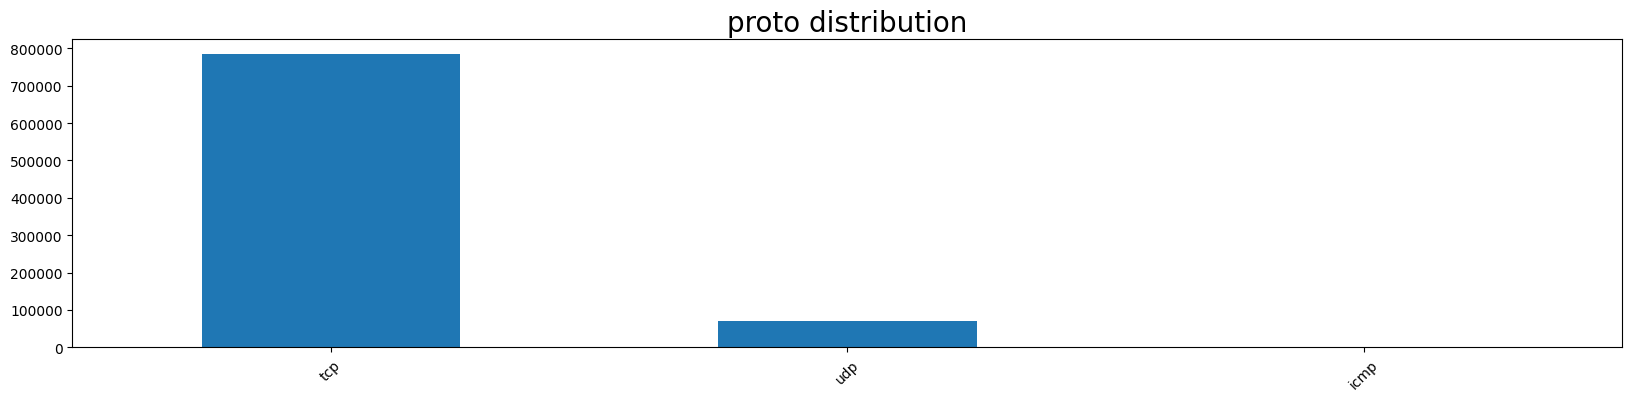

Column service
------------------------------
Unique Values (31): ['-' 'dns' 'http' 'ssl' 'dhcp' 'smb' 'ftp' 'radius' 'gssapi;smb;ntlm'
 'dce_rpc' 'gssapi;dce_rpc;smb;ntlm' 'gssapi;smb' 'gssapi' 'imap;ssl'
 'smtp;ssl' 'smtp' 'irc' 'imap' 'ssh' 'rfb' 'ssl;imap' 'krb_tcp' 'pop3'
 'ssl;smtp' 'smb;gssapi;ntlm' 'smb;dce_rpc;gssapi;ntlm' 'ftp-data'
 'smb;gssapi' 'ntlm;dce_rpc' 'smb;ntlm;gssapi' 'gssapi;ntlm;smb']

Value Counts:
-                          423444
http                       324589
dns                         66347
ssl                         38065
ftp                          1528
smtp;ssl                      694
ssl;smtp                      673
imap;ssl                      575
smtp                           42
smb;gssapi;ntlm                17
gssapi;smb;ntlm                17
ssl;imap                       16
smb                            15
imap                           10
dce_rpc                         9
dhcp                            8
ftp-data                      

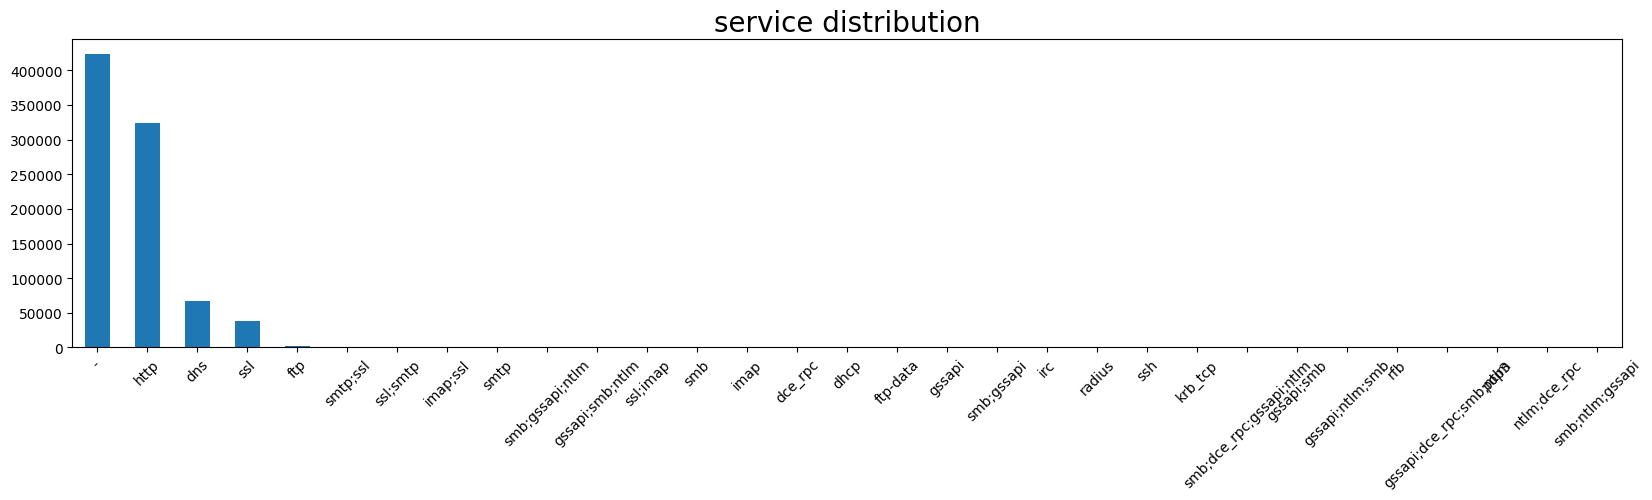

Column conn_state
------------------------------
Unique Values (13): ['REJ' 'S0' 'S1' 'OTH' 'SHR' 'RSTOS0' 'SF' 'RSTO' 'RSTRH' 'RSTR' 'S2' 'SH'
 'S3']

Value Counts:
SF        392533
S3        242099
S1         86918
REJ        59283
S0         25310
RSTO       20615
SHR        15805
OTH         3657
S2          3515
SH          2824
RSTR        2173
RSTOS0      1210
RSTRH        148
Name: conn_state, dtype: int64



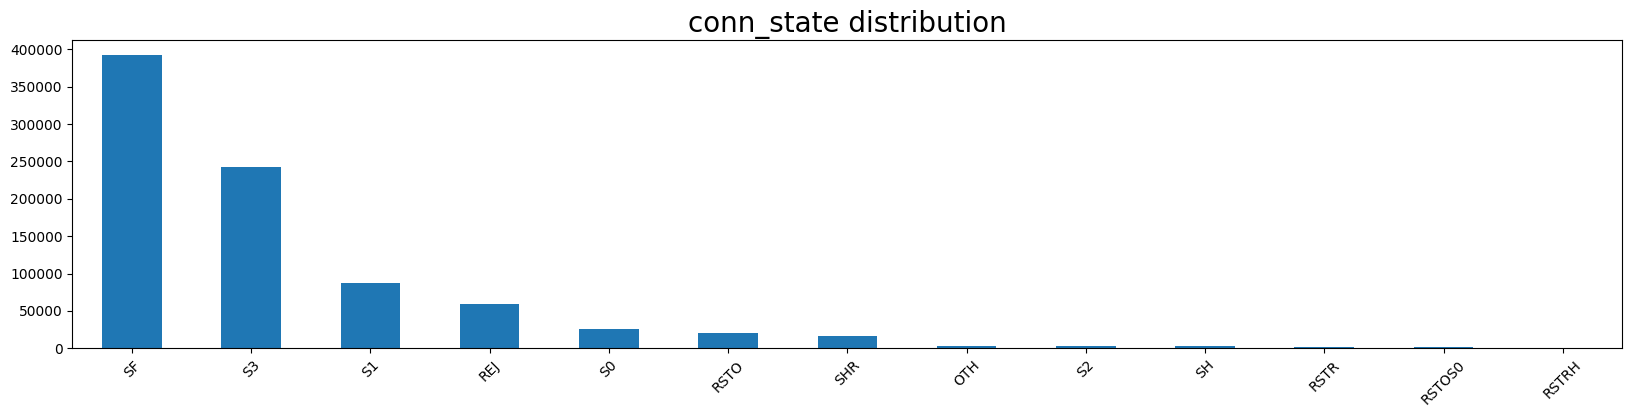

Column dns_AA
------------------------------
Unique Values (3): ['-' 'F' 'T']

Value Counts:
-    793207
F     59039
T      3844
Name: dns_AA, dtype: int64



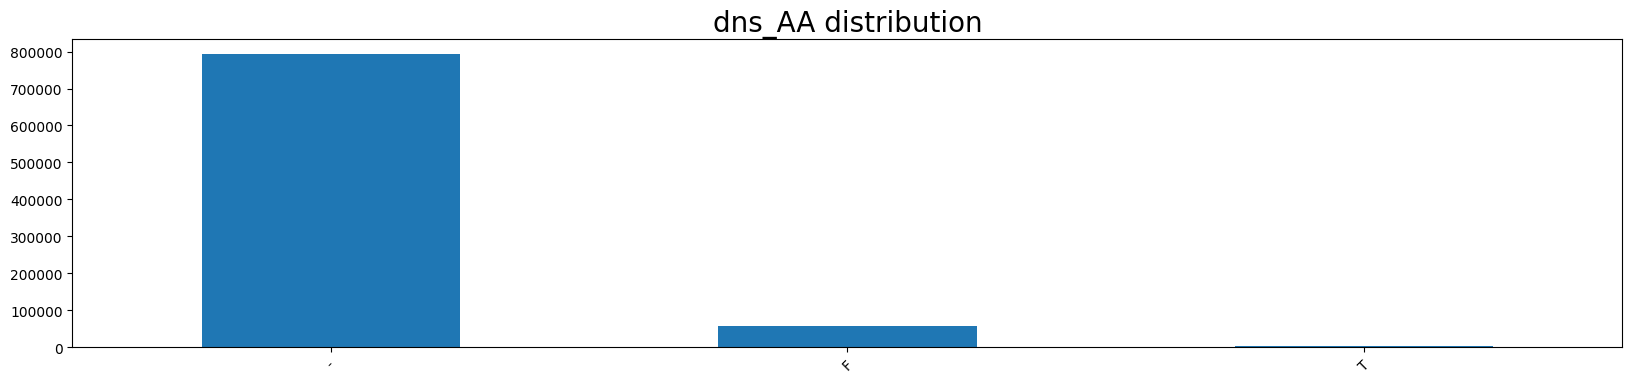

Column dns_RD
------------------------------
Unique Values (3): ['-' 'T' 'F']

Value Counts:
-    793207
T     52899
F      9984
Name: dns_RD, dtype: int64



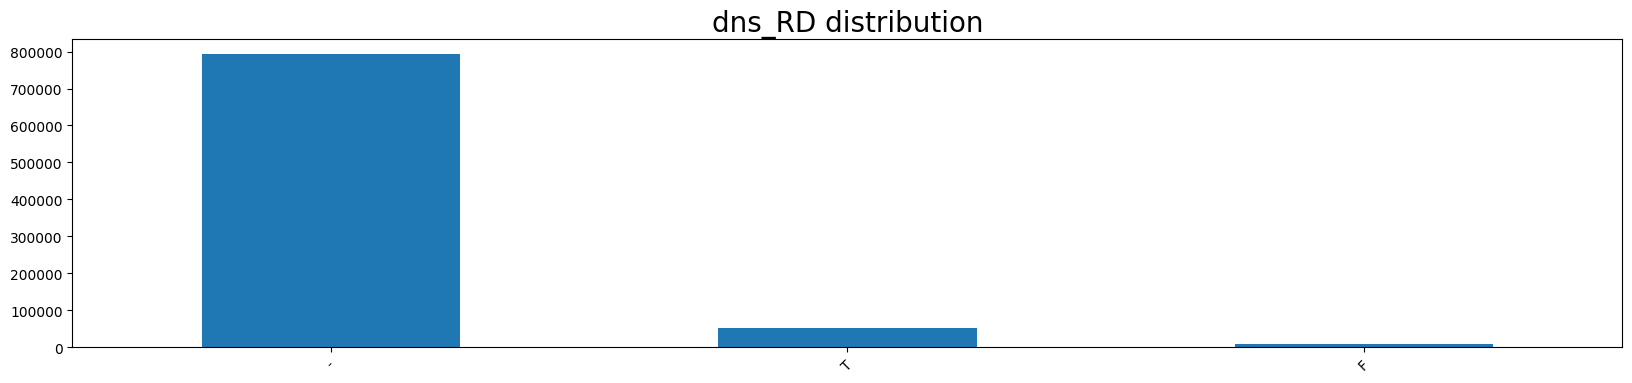

Column dns_RA
------------------------------
Unique Values (3): ['-' 'F' 'T']

Value Counts:
-    793207
F     33965
T     28918
Name: dns_RA, dtype: int64



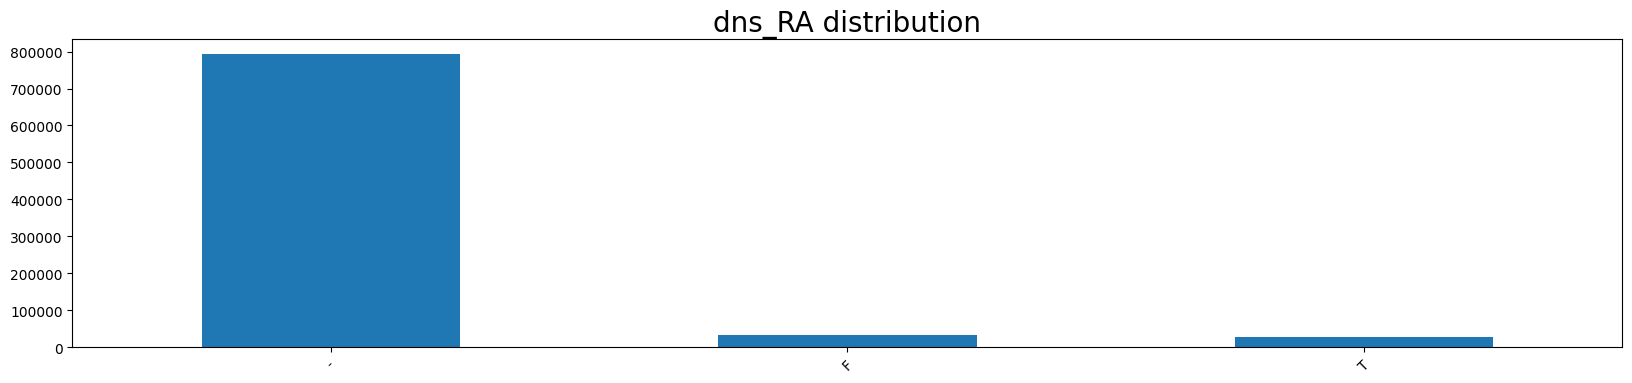

Column dns_rejected
------------------------------
Unique Values (3): ['-' 'F' 'T']

Value Counts:
-    793207
F     41062
T     21821
Name: dns_rejected, dtype: int64



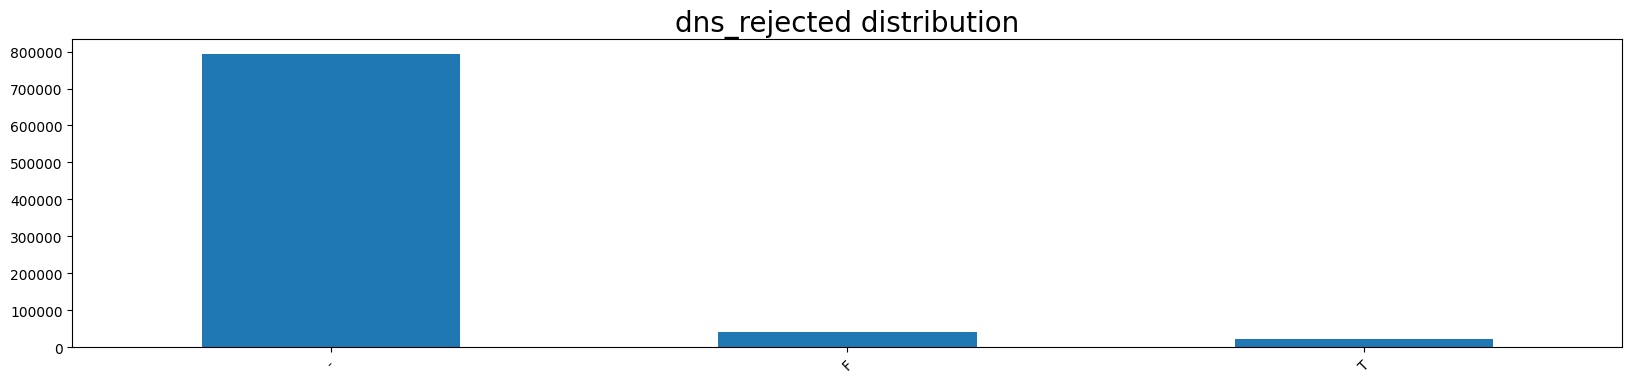

Column ssl_version
------------------------------
Unique Values (5): ['-' 'TLSv13' 'TLSv12' 'TLSv10' 'TLSv11']

Value Counts:
-         853751
TLSv10      2285
TLSv12        37
TLSv13        16
TLSv11         1
Name: ssl_version, dtype: int64



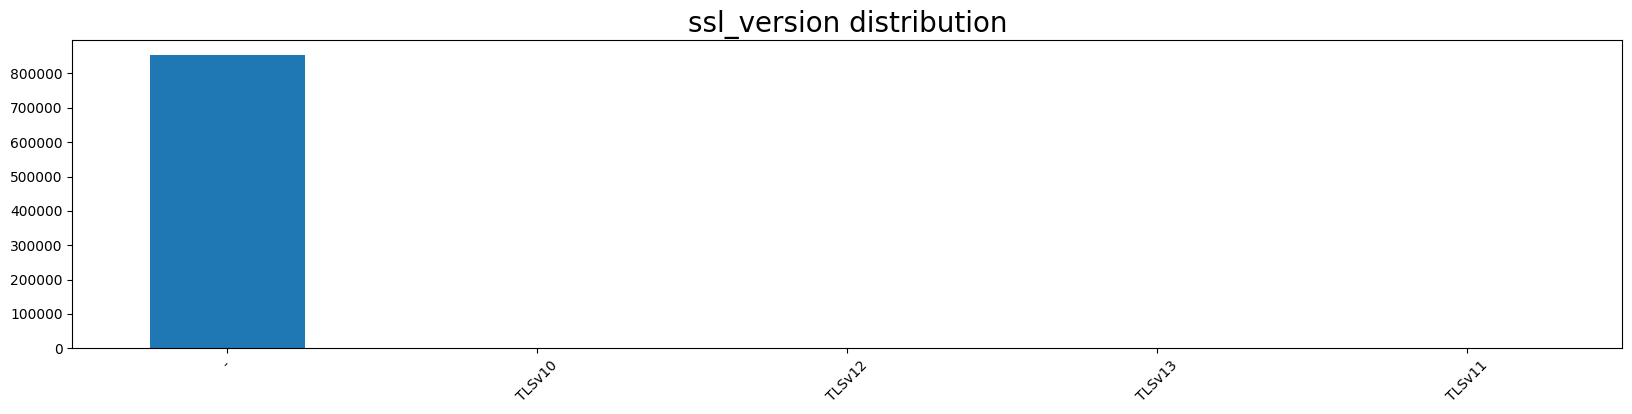

Column ssl_cipher
------------------------------
Unique Values (7): ['-' 'TLS_AES_128_GCM_SHA256' 'TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256'
 'TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384'
 'TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA' 'TLS_DHE_RSA_WITH_AES_128_CBC_SHA'
 'TLS_DHE_RSA_WITH_AES_256_CBC_SHA']

Value Counts:
-                                        853751
TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA         2285
TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256        26
TLS_AES_128_GCM_SHA256                       16
TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384        10
TLS_DHE_RSA_WITH_AES_128_CBC_SHA              1
TLS_DHE_RSA_WITH_AES_256_CBC_SHA              1
Name: ssl_cipher, dtype: int64



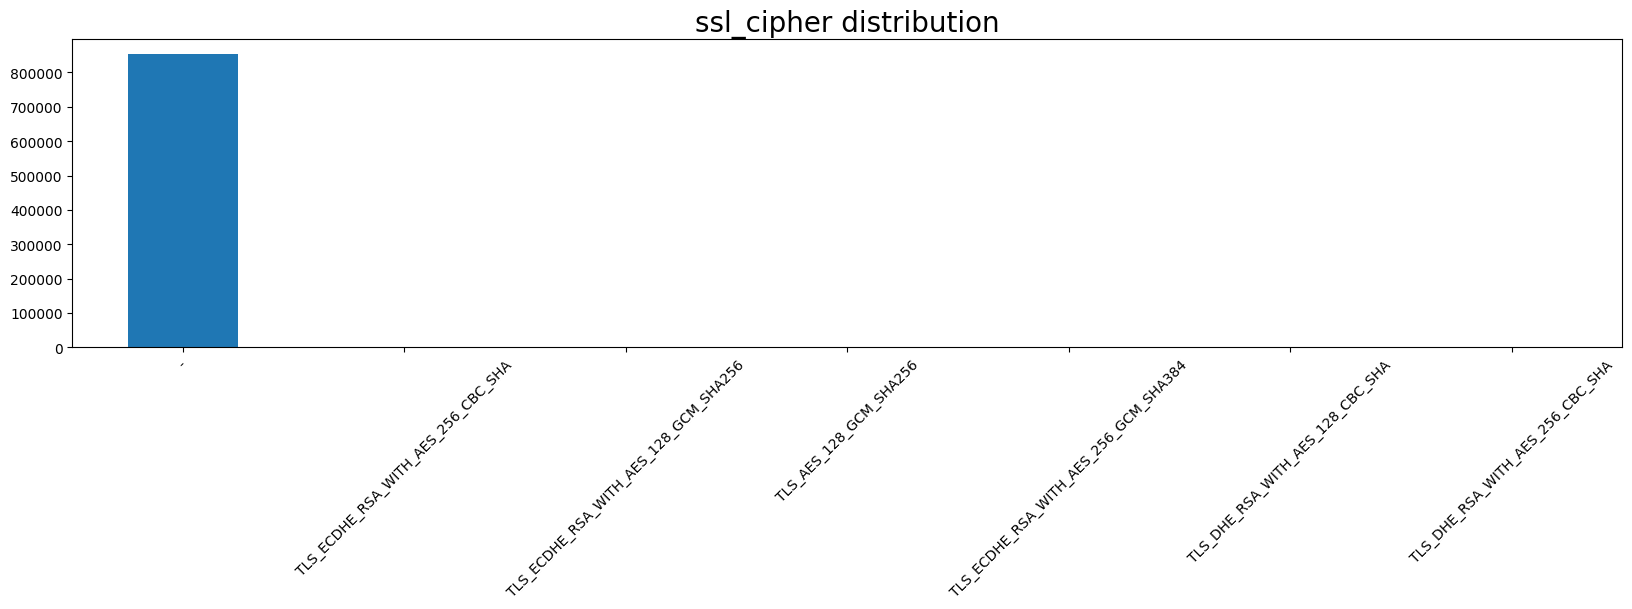

Column ssl_resumed
------------------------------
Unique Values (3): ['-' 'F' 'T']

Value Counts:
-    853603
F      2477
T        10
Name: ssl_resumed, dtype: int64



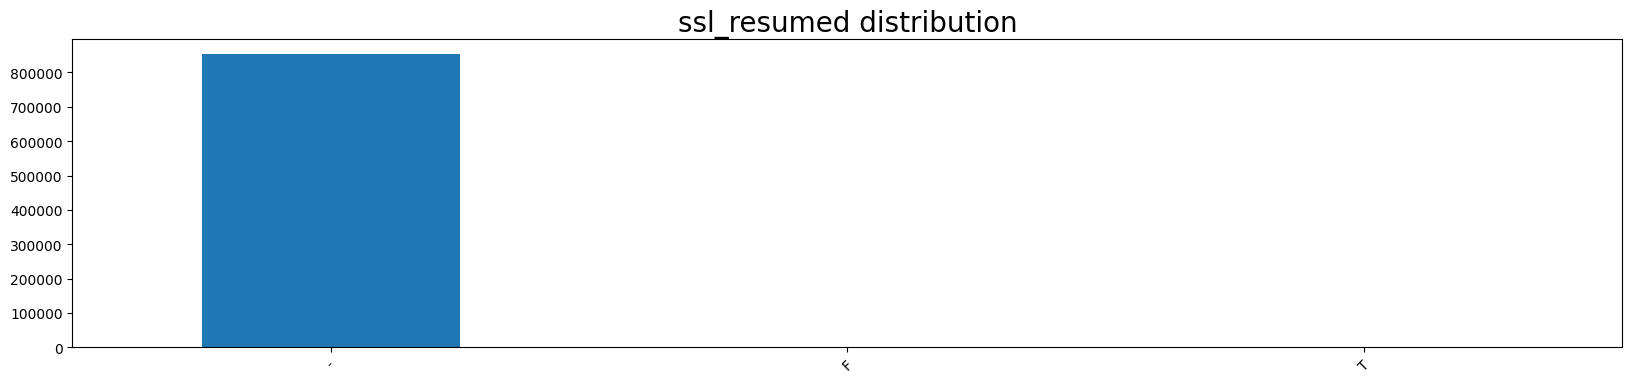

Column ssl_established
------------------------------
Unique Values (3): ['-' 'F' 'T']

Value Counts:
-    853603
T      2229
F       258
Name: ssl_established, dtype: int64



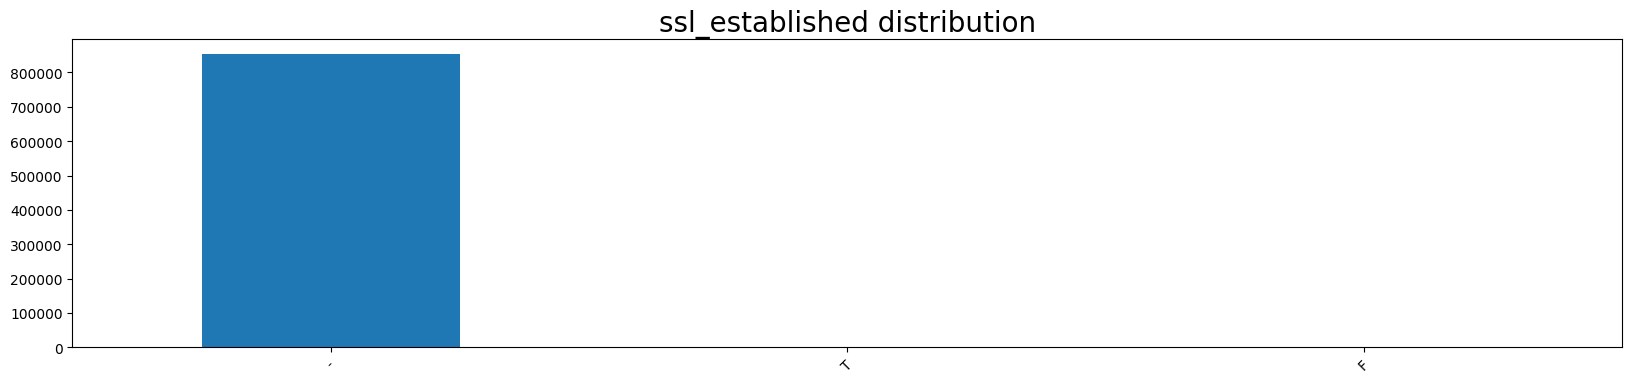

Column http_trans_depth
------------------------------
Unique Values (3): ['-' '1' '2']

Value Counts:
-    853725
1      2361
2         4
Name: http_trans_depth, dtype: int64



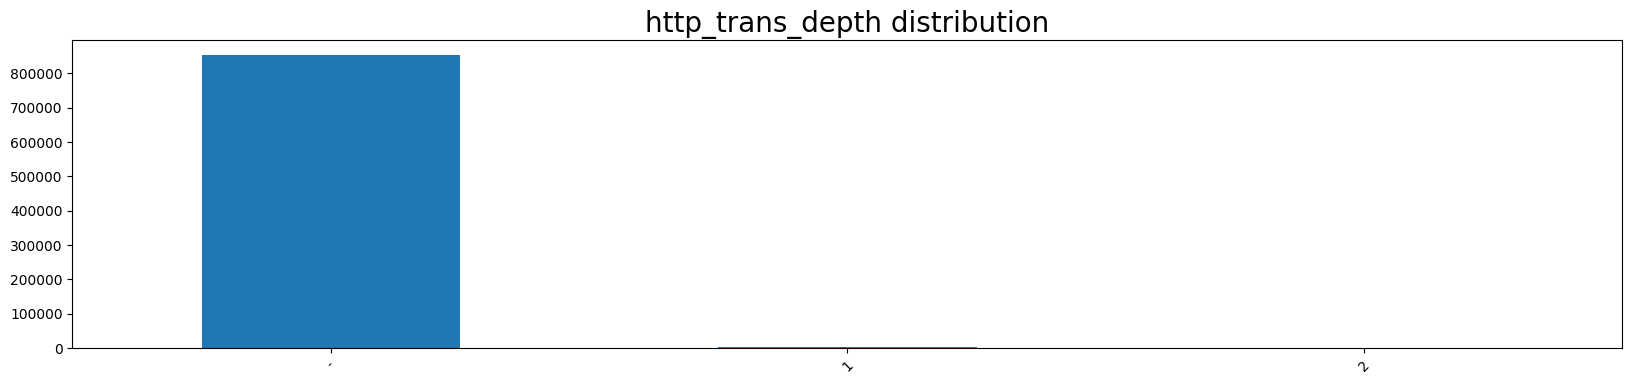

Column http_resp_mime_types
------------------------------
Unique Values (7): ['-' 'application/xml' 'application/vnd.ms-cab-compressed' 'image/png'
 'application/x-debian-package' 'text/html' 'text/plain']

Value Counts:
-                                    855469
text/html                               435
text/plain                              175
application/xml                           7
image/png                                 2
application/vnd.ms-cab-compressed         1
application/x-debian-package              1
Name: http_resp_mime_types, dtype: int64



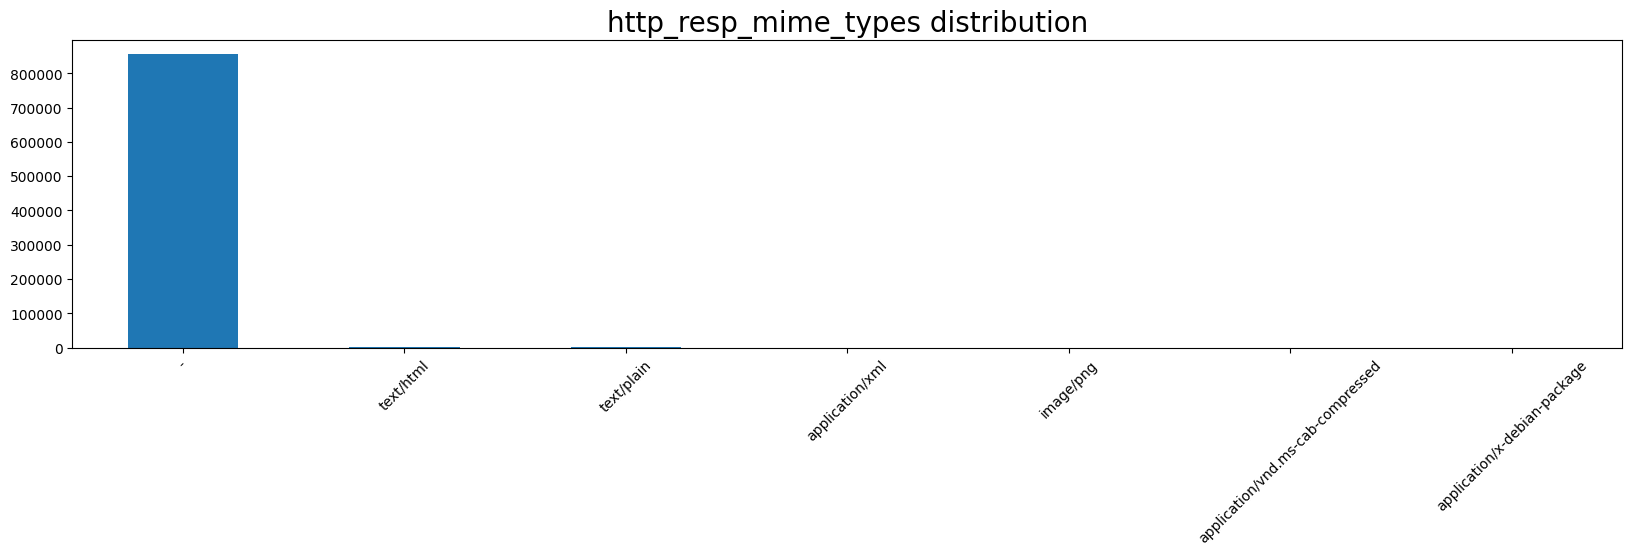

Column weird_name
------------------------------
Unique Values (13): ['-' 'active_connection_reuse' 'DNS_RR_unknown_type'
 'line_terminated_with_single_CR' 'NUL_in_line' 'data_before_established'
 'bad_TCP_checksum' 'bad_UDP_checksum' 'dnp3_corrupt_header_checksum'
 'connection_originator_SYN_ack' 'possible_split_routing'
 'TCP_ack_underflow_or_misorder' 'unescaped_%_in_URI']

Value Counts:
-                                 855846
DNS_RR_unknown_type                  115
TCP_ack_underflow_or_misorder         58
possible_split_routing                19
data_before_established               13
connection_originator_SYN_ack         11
bad_UDP_checksum                      10
dnp3_corrupt_header_checksum           6
line_terminated_with_single_CR         5
NUL_in_line                            2
bad_TCP_checksum                       2
unescaped_%_in_URI                     2
active_connection_reuse                1
Name: weird_name, dtype: int64



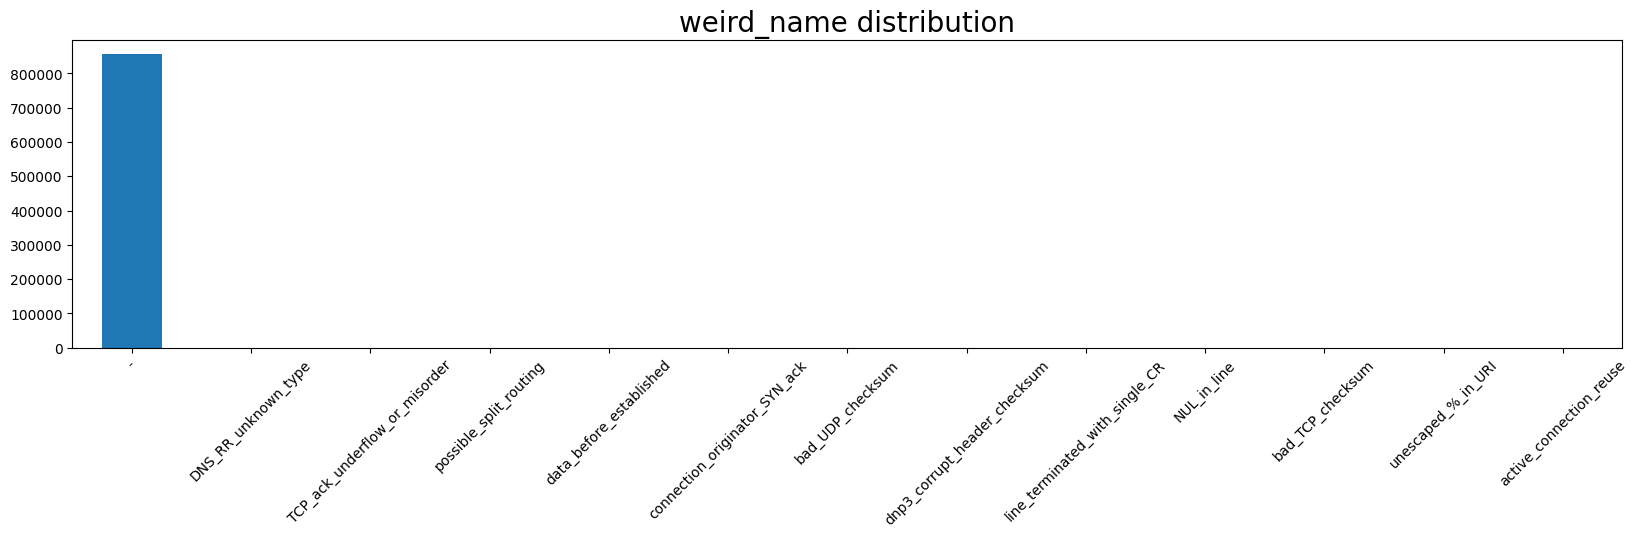

Column weird_addl
------------------------------
Unique Values (4): ['-' '46' '48' '43']

Value Counts:
-     855975
46       104
48         8
43         3
Name: weird_addl, dtype: int64



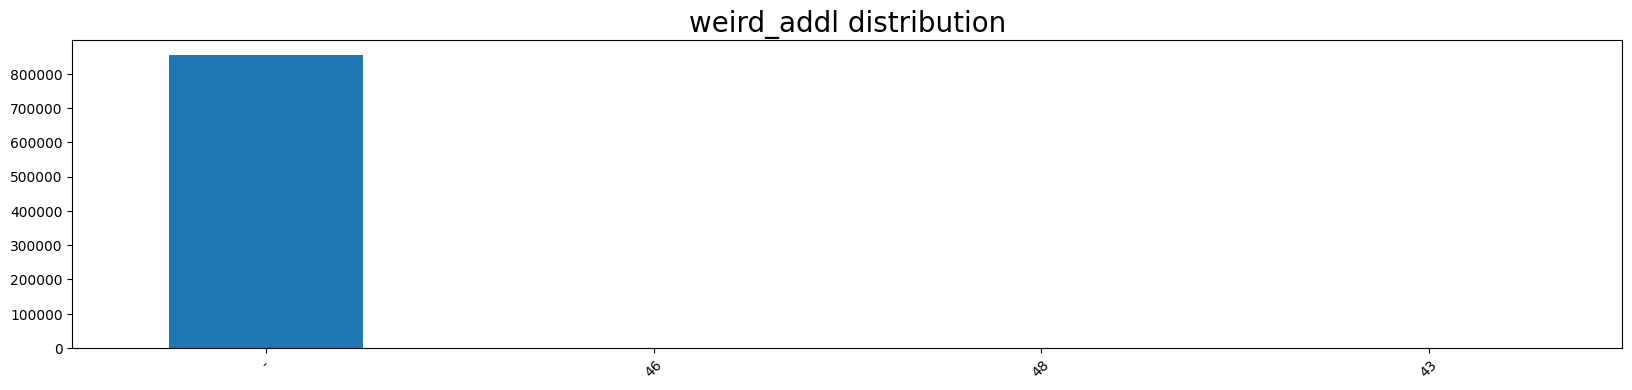

Column label
------------------------------
Unique Values (2): [ True False]

Value Counts:
True     814670
False     41420
Name: label, dtype: int64



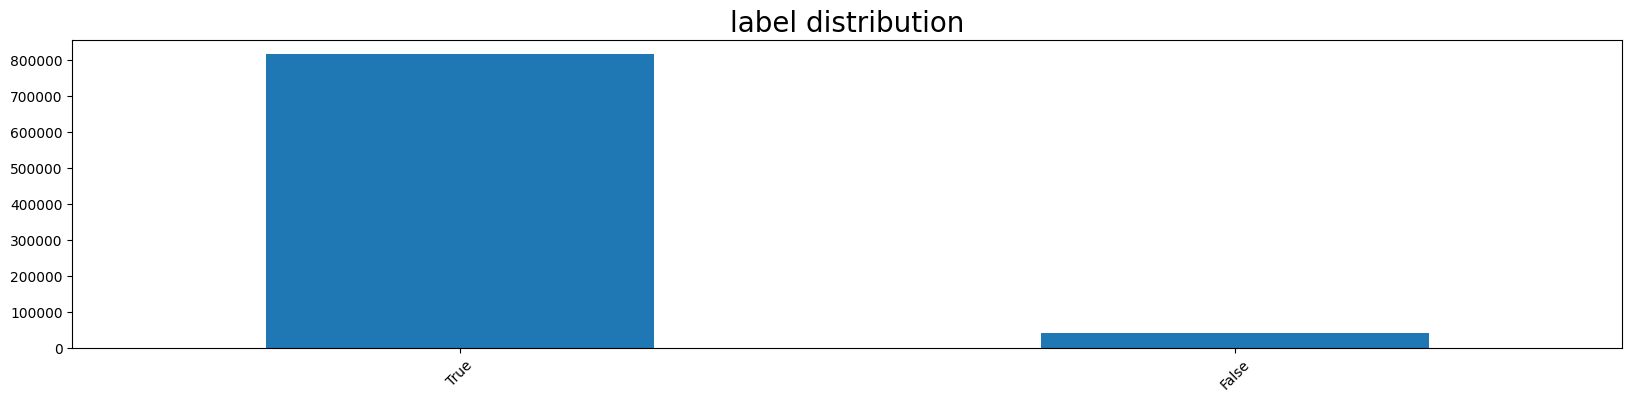

Column attack_type
------------------------------
Unique Values (10): ['scanning' 'normal' 'dos' 'injection' 'ddos' 'password' 'xss'
 'ransomware' 'backdoor' 'mitm']

Value Counts:
ddos          384526
xss           172253
password      125643
scanning       67528
injection      45003
normal         41420
dos            14645
backdoor        4608
mitm             310
ransomware       154
Name: attack_type, dtype: int64



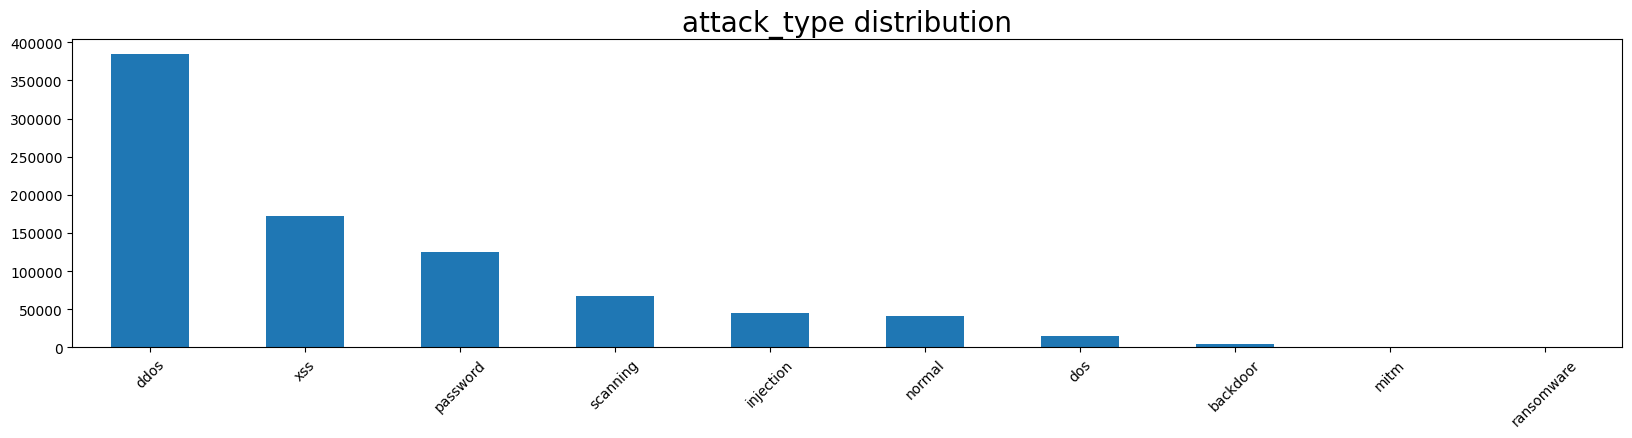

Column attack
------------------------------
Unique Values (2): [ True False]

Value Counts:
True     814670
False     41420
Name: attack, dtype: int64



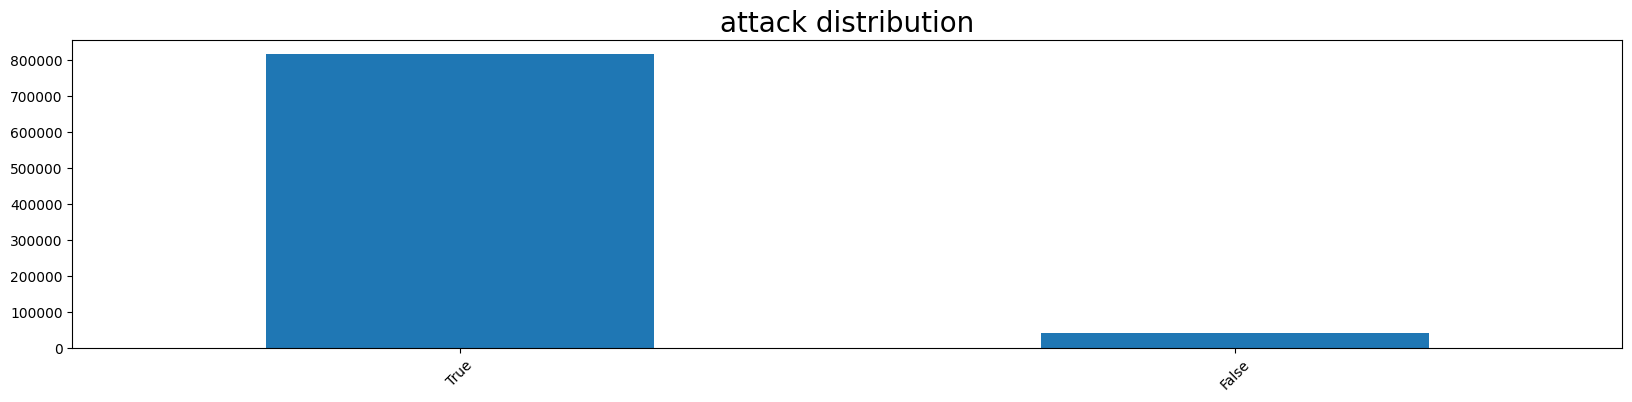

In [44]:
# Non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Show the distribution for each one
for column_name in non_numerical_columns:
    print(f"Column {column_name}\n{'-'*30}")
    unique_vals = df[column_name].unique()
    value_counts = df[column_name].value_counts()
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
    print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
    plt.figure(figsize=(20,4))
    value_counts.plot(kind="bar")
    plt.title(f"{column_name} distribution", fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

Violin plot for each numerical feature

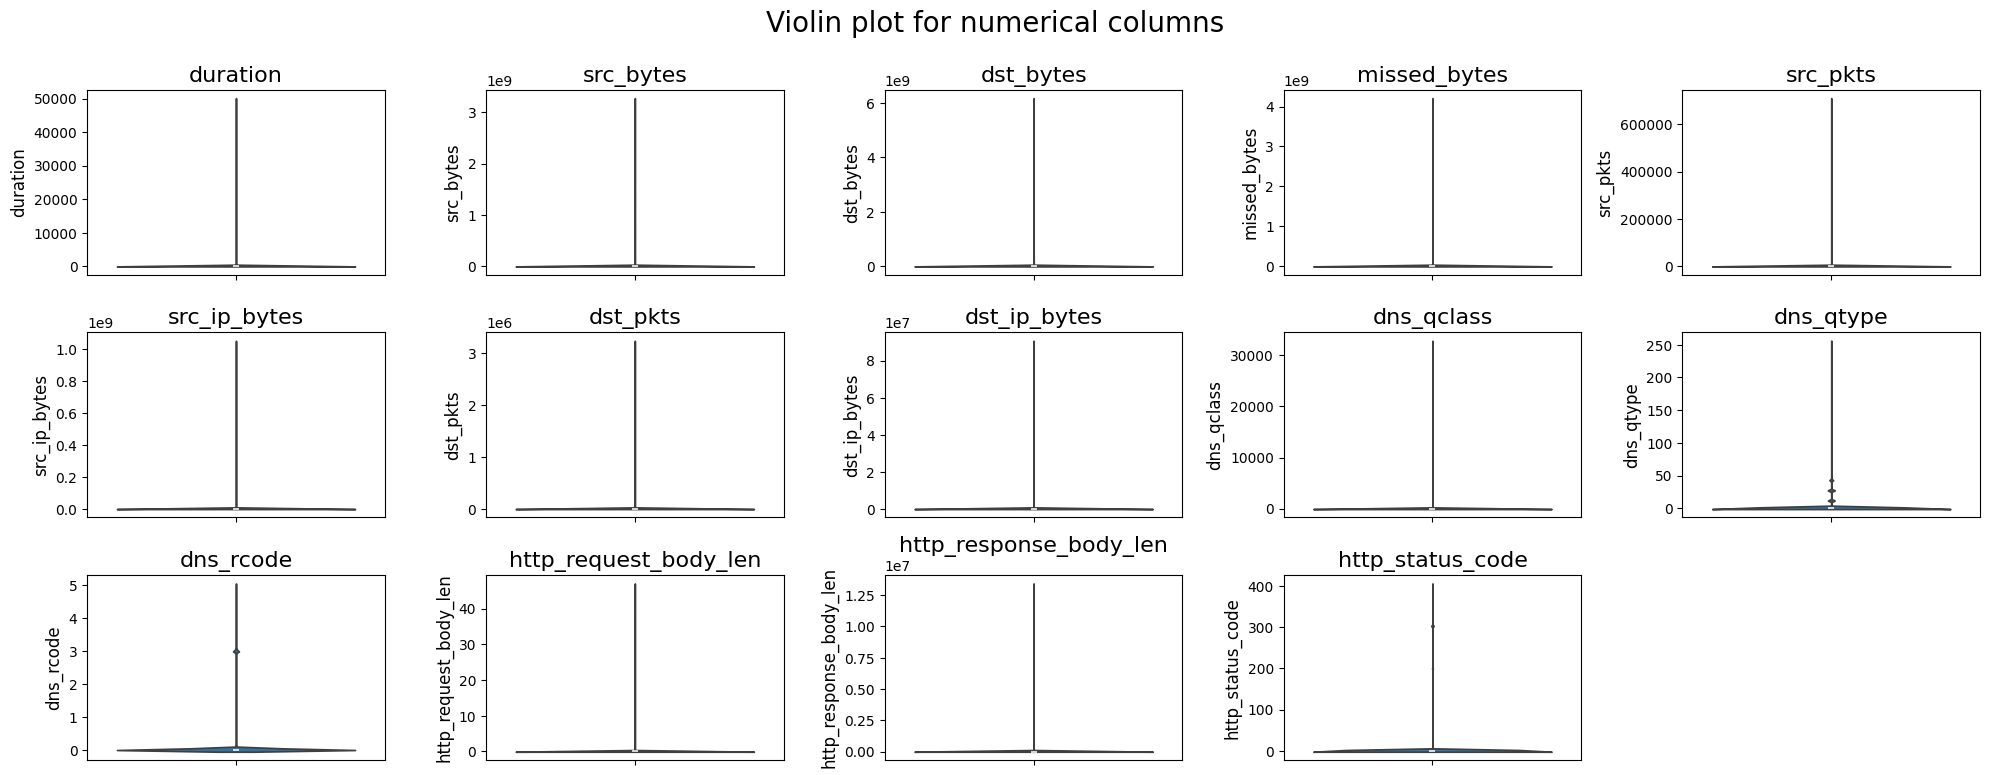

In [45]:
# Numerical columns
numerical_columns = df.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

# Create subplots for violin plots
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a violin plot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.violinplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Violin plot for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Semi-log histogram for each numerical feature

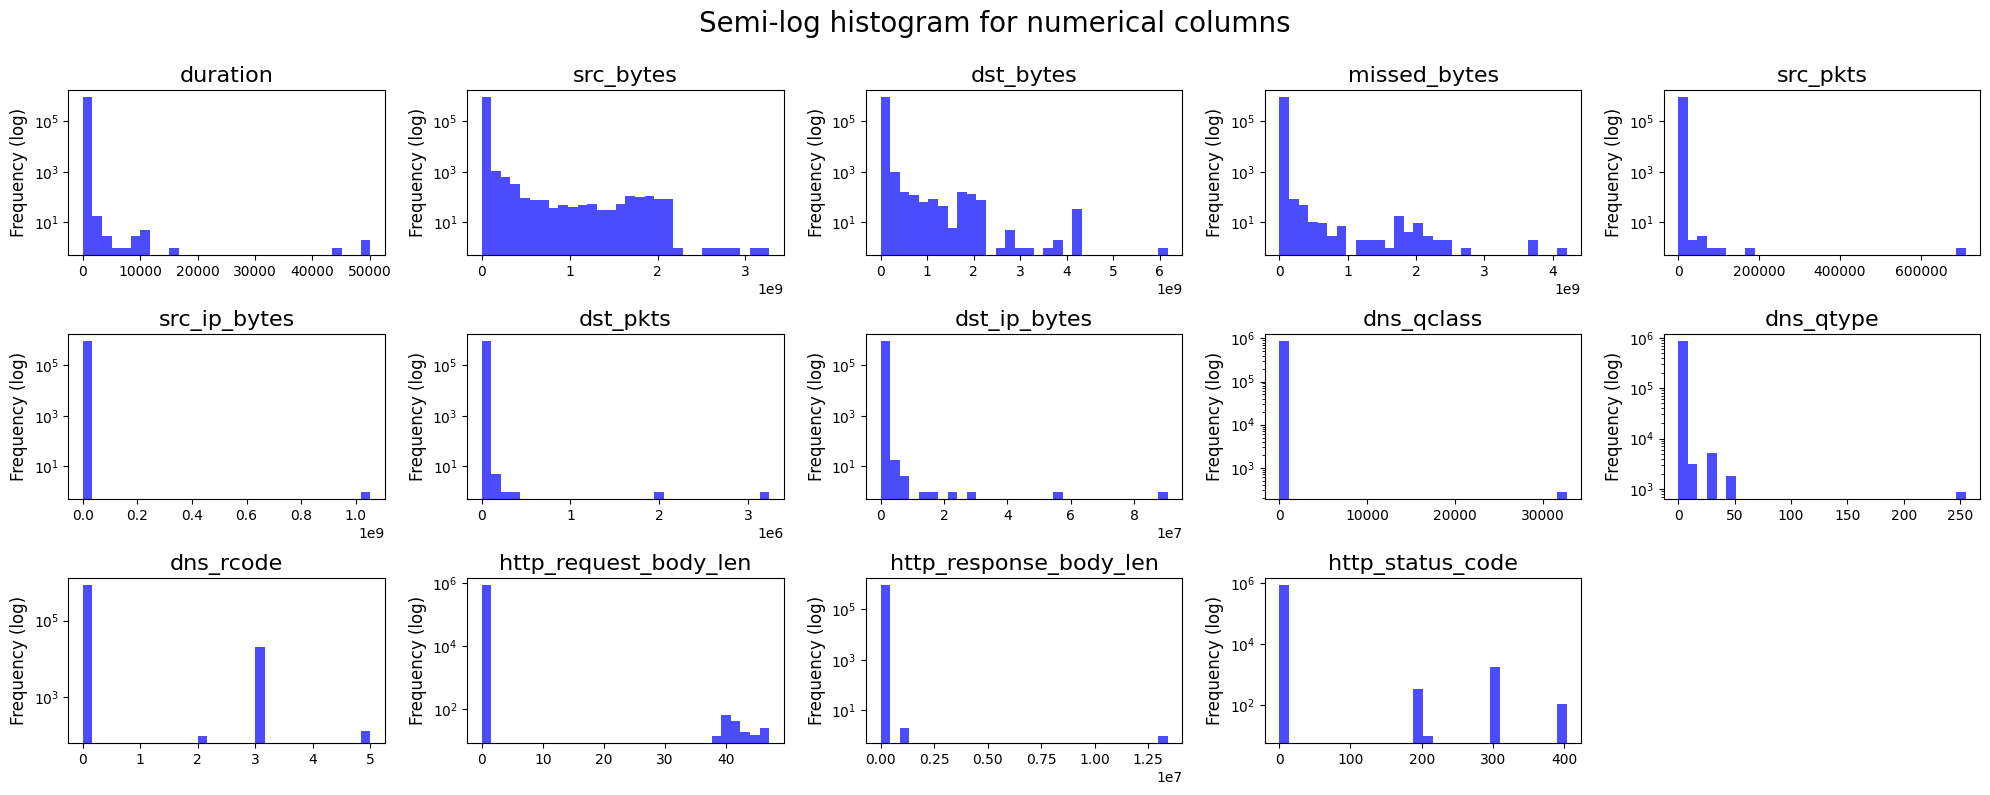

In [46]:
# Create subplots for semi-log histograms
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a semi-log histogram for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30, log=True, color='blue', alpha=0.7)
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency (log)', fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Semi-log histogram for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Plot the distributions of Attack and Attack Types with percentages

In [47]:
def plot_distribution_with_percentages(col_name):
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(data=df, x=col_name, hue=col_name, legend=False)
    total = len(df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        if percentage > 0:
            ax.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height() * 0.985), 
                    ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Distribution of {col_name} with percentages", fontsize=20)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

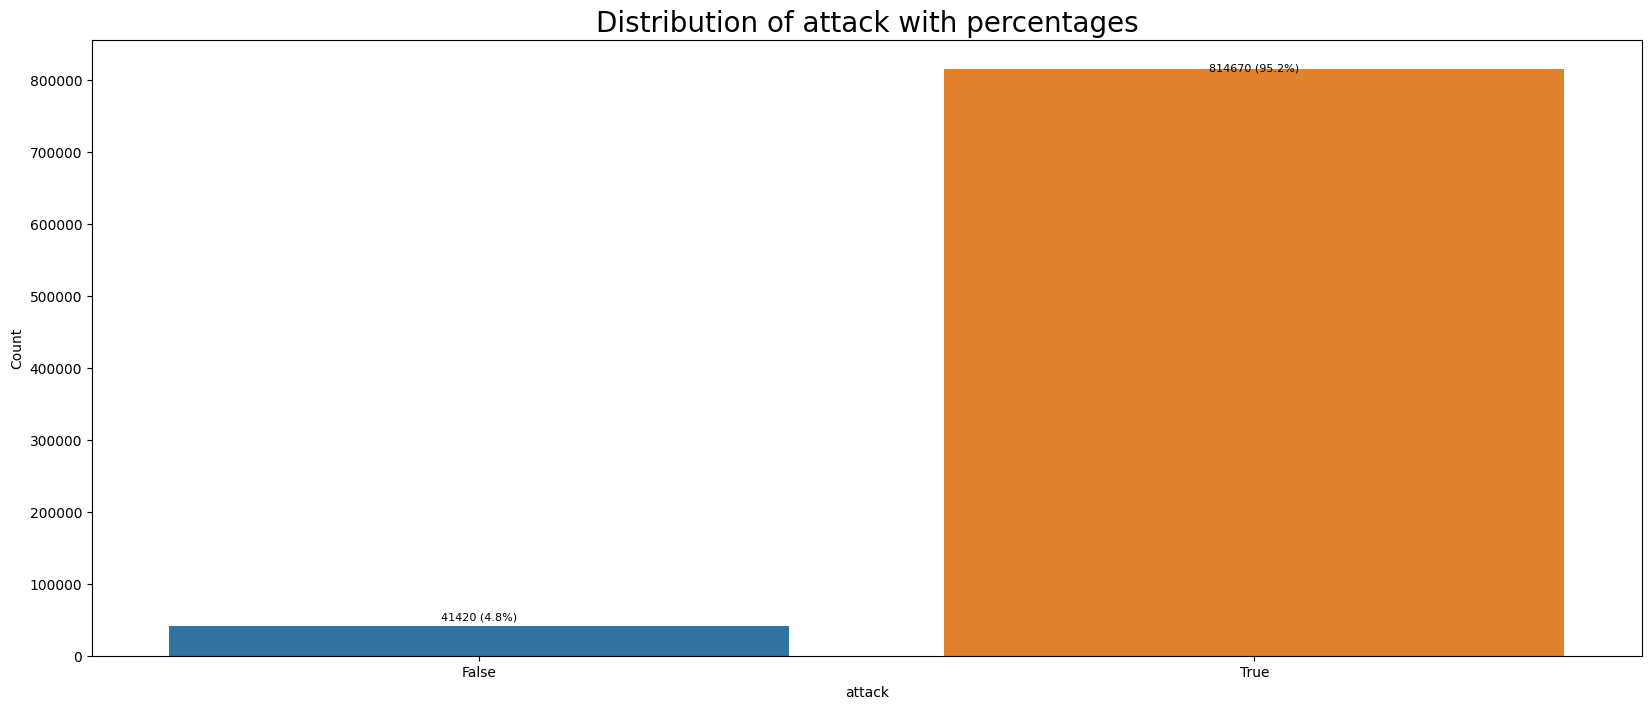

In [48]:
# Distribution of Attack with percentages
plot_distribution_with_percentages('attack')

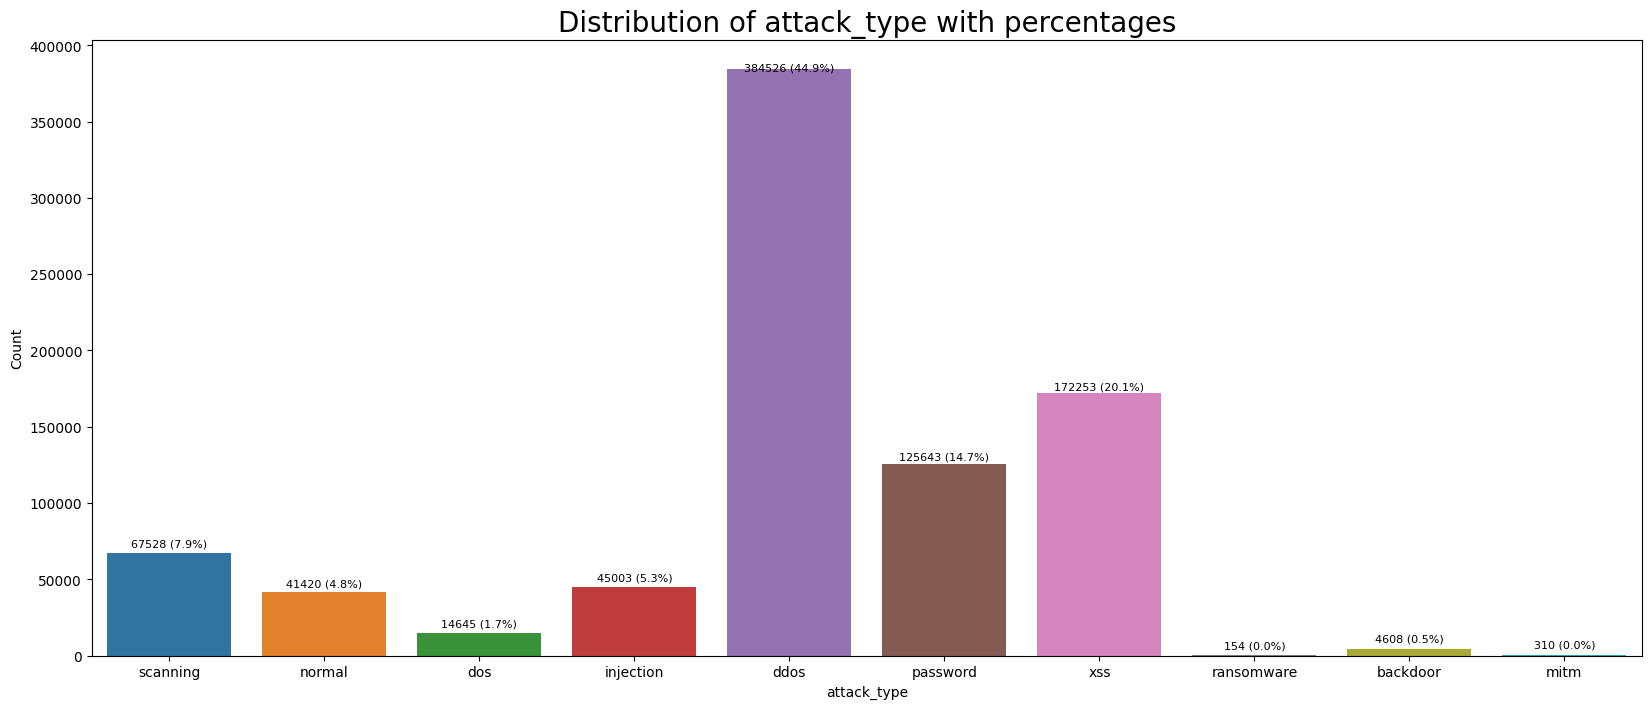

In [49]:
# Distribution of Attack Type with percentages
plot_distribution_with_percentages('attack_type')

### Covariate Analysis

In [50]:
# Compare column vs column
def hist_col_vs_col(col1, col2, top_n=10):
    # Get the top N categories by count in col2, to avoid a huge plot
    top_categories = df[col2].value_counts().head(top_n).index
    filtered_df = df[df[col2].isin(top_categories)]
    
    # Set dynamic title
    title_suffix = f" (top {top_n} for {col2})" if df[col2].nunique() > top_n else ""
    title = f'{col1} vs {col2}{title_suffix}'
    
    plt.figure(figsize=(20, 8))
    sns.countplot(x=col1, data=filtered_df, hue=col2, palette=sns.color_palette("dark", as_cmap=False, n_colors=filtered_df[col2].nunique()))
    plt.xticks(rotation=45)
    plt.title(title, fontsize=20)
    plt.legend(title=col2)
    plt.show()

Compare Attack vs Protocol

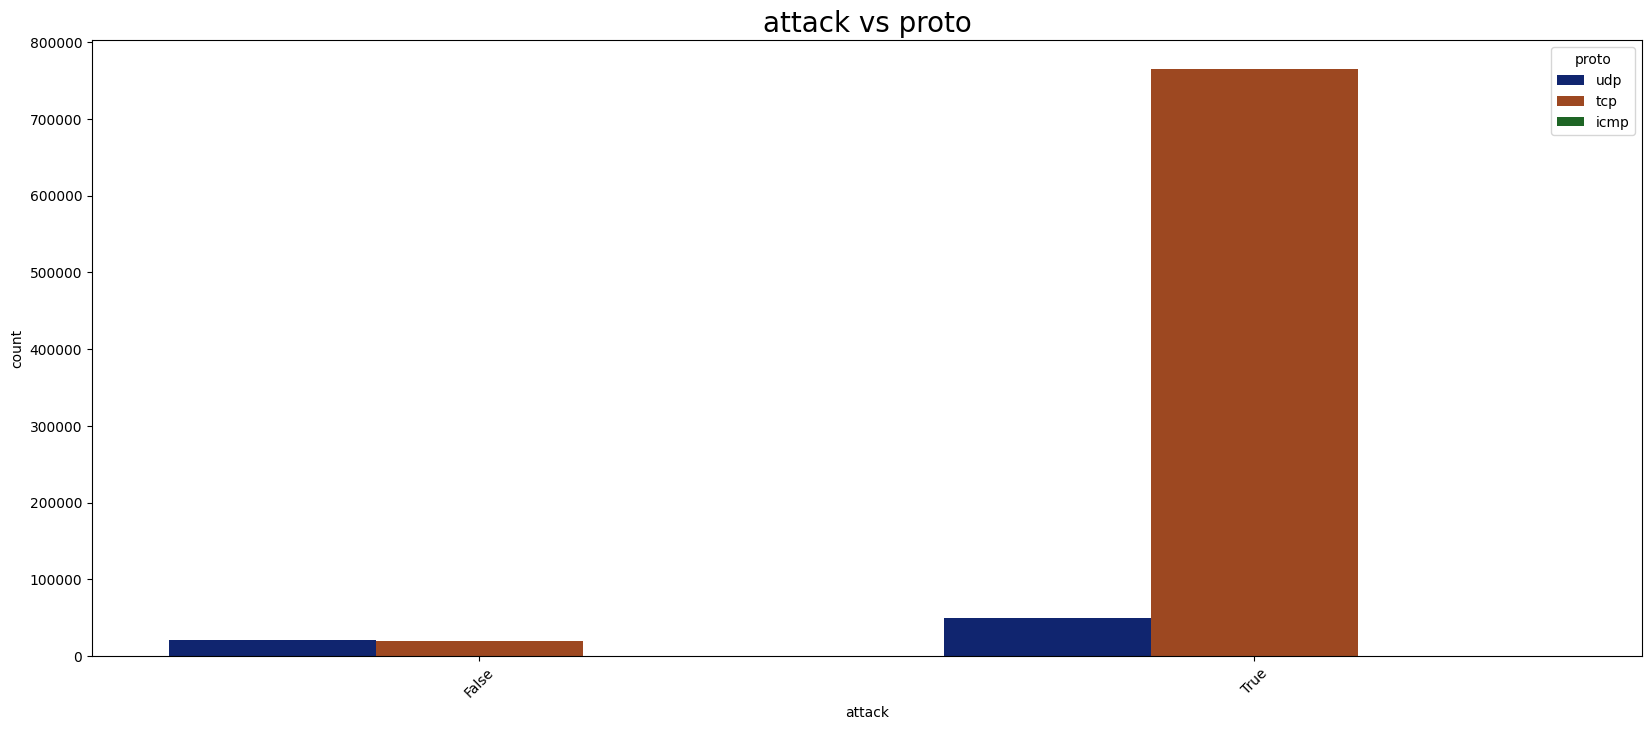

In [51]:
hist_col_vs_col('attack', 'proto')

Compare Attack Type vs Protocol

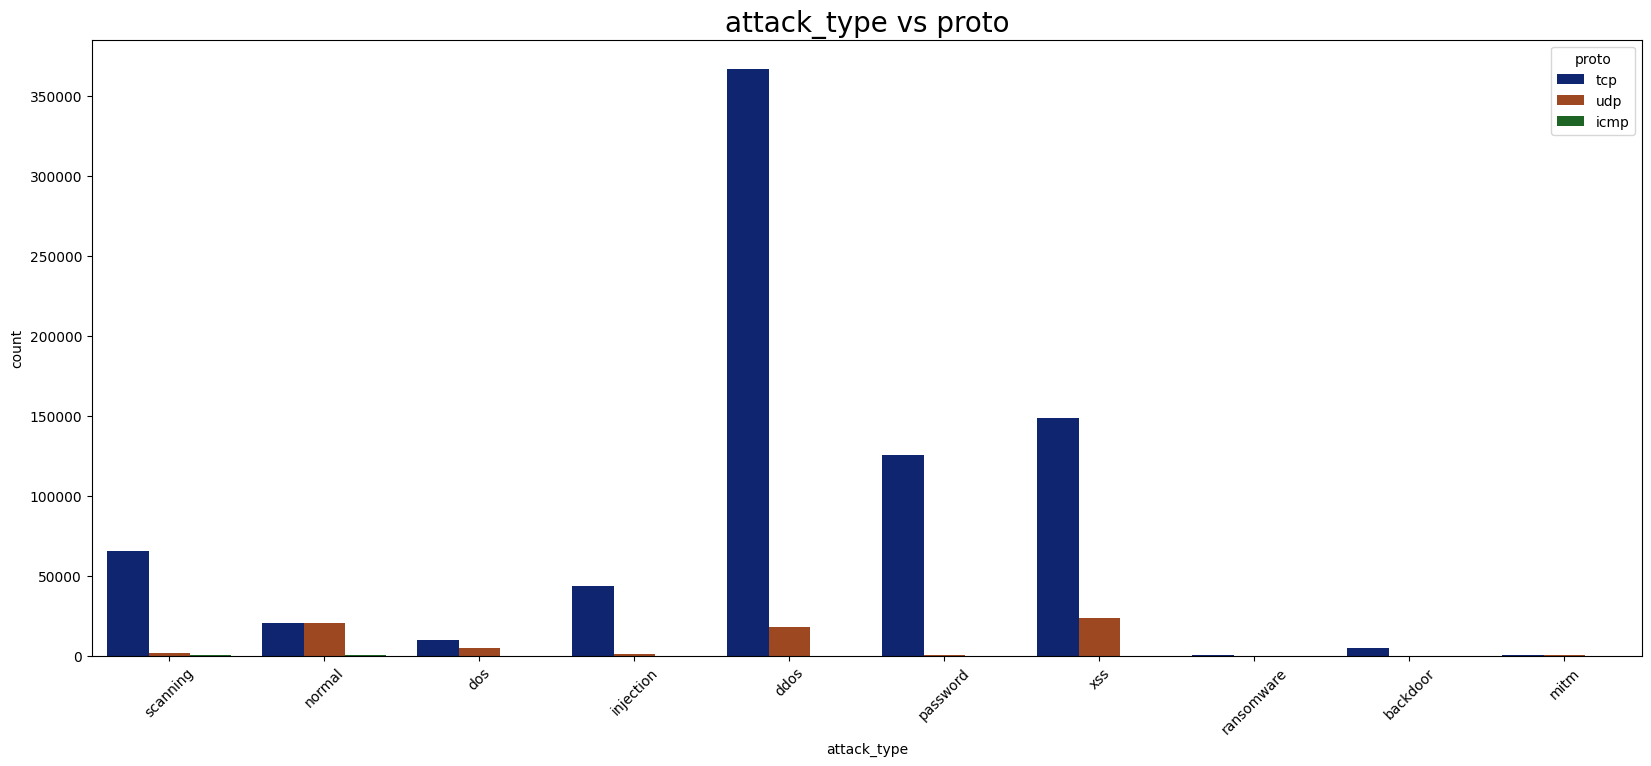

In [52]:
hist_col_vs_col('attack_type', 'proto')

Correlation matrix, useful for finding very correlated features

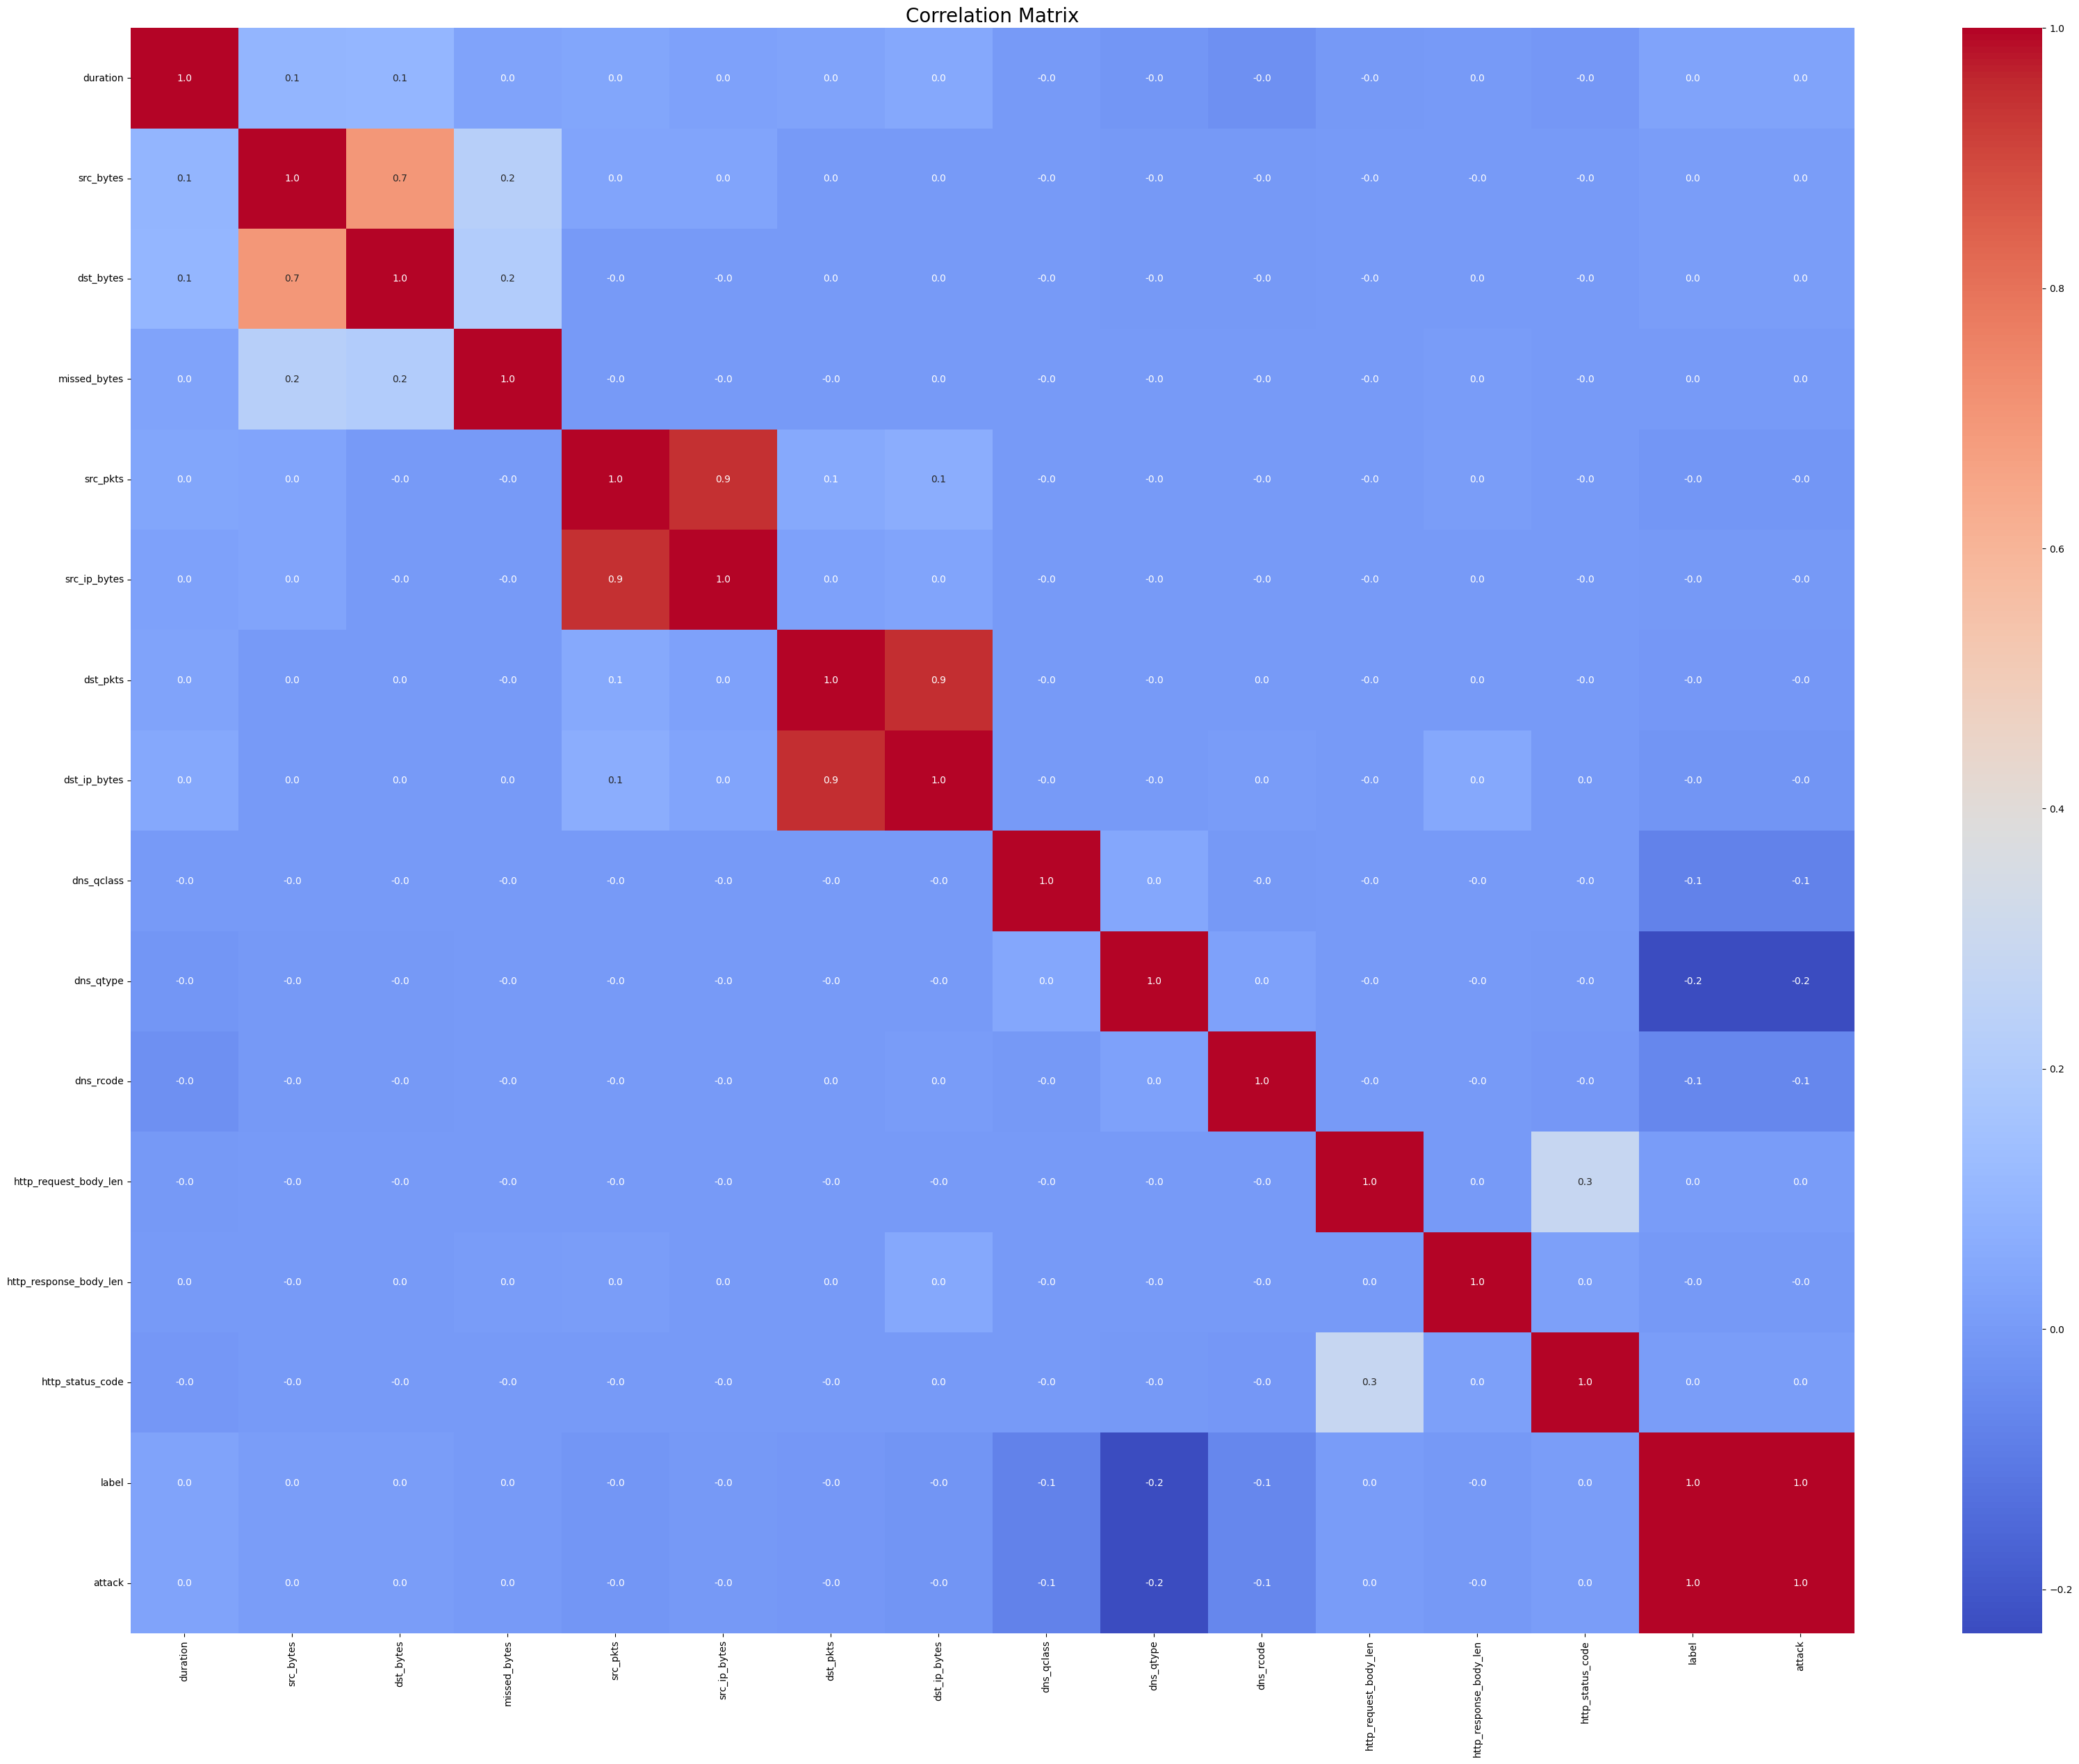

In [53]:
plt.figure(figsize=(40, 30))
correlation_matrix = df[df.select_dtypes(exclude=['object', 'category']).columns.tolist()].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Compare the subset of most correlated (|corr| > 0.5) features vs Attack

In [54]:
def compare_feature_target(feature_name):
    # Set up the plotting area with only two columns for histogram and violin plot
    _, axes = plt.subplots(1, 2, figsize=(14, 3))

    # Histogram
    sns.histplot(df[feature_name], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {feature_name}", fontsize=20)
    axes[0].set_xlabel(feature_name)

    # Violin plot colored by Attack
    sns.violinplot(data=df, x='attack', y=feature_name, hue='attack', ax=axes[1])
    axes[1].set_title(f"Violin Plot of {feature_name} by Attack", fontsize=20)
    axes[1].get_legend().remove()

    plt.tight_layout()
    plt.show()

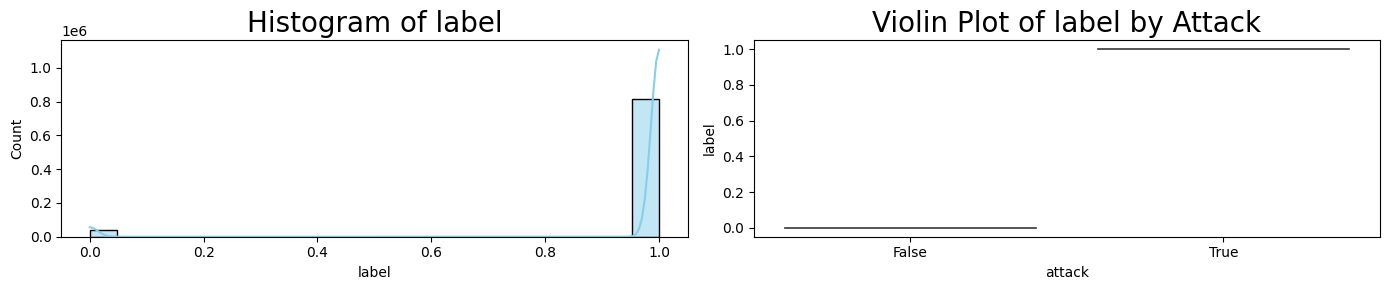

In [55]:
# Filter features with |correlation| > 0.5 w.r.t Attack and compare
target_corr = correlation_matrix['attack'].drop('attack')
for feature in target_corr[abs(target_corr) > 0.5].index.tolist():
    compare_feature_target(feature)

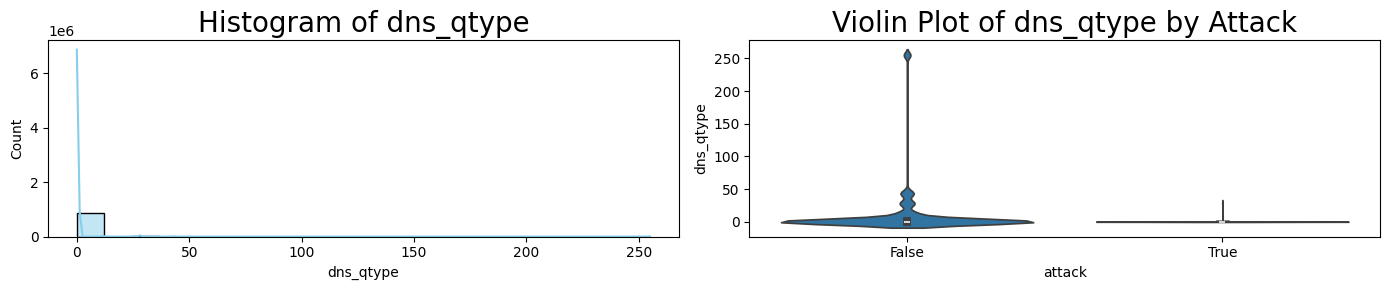

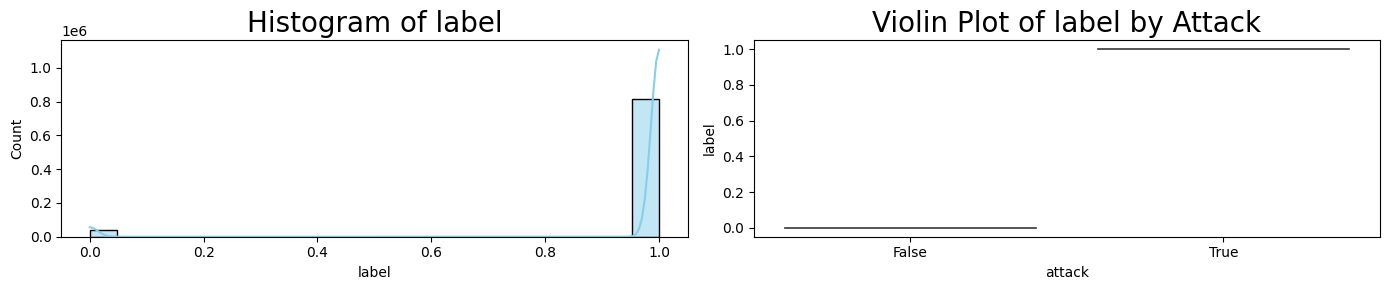

In [56]:
for feature in target_corr[abs(target_corr) > 0.2].index.tolist():
    compare_feature_target(feature)